In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Example path if it's directly in MyDrive:
file_path = '/content/drive/MyDrive/HealthCareData.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Show the first 5 rows
df.head()


,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
# 🔁 Step 1: Make a copy of the original DataFrame
df_original = df.copy()

# 💾 Step 2: Save the backup copy to Google Drive with a new name
backup_path = '/content/drive/MyDrive/HealthCareData_Backup_Untouched.xlsx'
df_original.to_excel(backup_path, index=False)

print("✅ Backup saved as 'HealthCareData_Backup_Untouched.xlsx'")


✅ Backup saved as 'HealthCareData_Backup_Untouched.xlsx'


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
df.shape

(950, 42)

In [ ]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [ ]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [ ]:
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

print("\n✅ Columns retained after dropping those with >50% missing values:\n")
print(df.columns)


✅ Columns retained after dropping those with >50% missing values:

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'MCV   (femtoliters/cell)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  n

In [ ]:
for col in df.columns:
      if df[col].isnull().any():
              if df[col].dtype == 'object':
                          # Categorical column → fill with 'Unknown'
                            df[col].fillna('Unknown', inplace=True)
              else:
                                                          # Numeric column
                            unique_vals = df[col].nunique()
                            skew = df[col].skew()

                            if unique_vals <= 5:
                                                                                                              # Discrete numeric → fill with mode
                                 mode_val = df[col].mode()[0]
                                 df[col].fillna(mode_val, inplace=True)
                            elif abs(skew) < 1:
                                                                                                                                                                          # Not skewed → fill with mean
                                 df[col].fillna(df[col].mean(), inplace=True)
                            else:
                                                                                                                                                                                                                      # Skewed → fill with median
                                 df[col].fillna(df[col].median(), inplace=True)

                                                                                                                                                                                                                                      # Step 3: Check if all missing values are handled
print("\n✅ Missing values after cleaning:\n")
print(df.isnull().sum())


✅ Missing values after cleaning:

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary  

/tmp/ipython-input-9-546952253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-9-546952253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-9-546952253.py:17: FutureWarning: A value is trying to be set on a copy of a Dat

In [ ]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
mean_cols = []
median_cols = []
mode_cols = []
unknown_cols = []

for col in df.columns:
    if df[col].isnull().any():
        continue
        if df[col].dtype == 'object':
             unknown_cols.append(col)
        else:
             unique_vals = df[col].nunique()
             skew = df[col].skew()
             if unique_vals <= 5:
                mode_cols.append(col)
             elif abs(skew) < 1:
                mean_cols.append(col)
             else:
                median_cols.append(col)
print("🔹 Filled with MODE (Discrete Numeric):", mode_cols)
print("🔹 Filled with MEAN (Low Skew):", mean_cols)
print("🔹 Filled with MEDIAN (High Skew):", median_cols)
print("🔹 Filled with 'Unknown' (Categorical):", unknown_cols)

🔹 Filled with MODE (Discrete Numeric): []
🔹 Filled with MEAN (Low Skew): []
🔹 Filled with MEDIAN (High Skew): []
🔹 Filled with 'Unknown' (Categorical): []


In [ ]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),False
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [ ]:
categorical_features = df.select_dtypes(include = ['object'])
print(categorical_features.columns)

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')


In [ ]:
if 'S.NO' in df.columns:
      df = df.drop('S.NO', axis=1)
df.head()


,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,55,male,rural,12,2,branded liquor,negative,negative,YES,138/90,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,55,male,rural,12,2,branded liquor,negative,negative,YES,138/90,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,55,male,rural,12,2,branded liquor,negative,negative,YES,138/90,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,55,male,rural,12,2,branded liquor,negative,negative,NO,138/90,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,55,female,rural,12,2,branded liquor,negative,negative,YES,138/90,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you already have your DataFrame 'df'

# Step 1: Select categorical columns (type 'object' or 'category')
categorical_features = df.select_dtypes(include=['object'])
categorical_cols = categorical_features.columns.tolist()

# Step 2: Select only those with ≤ 5 unique values for One-Hot Encoding
onehot_cols = [col for col in categorical_cols if df[col].nunique() <= 5]

# Step 3: One-Hot Encode these columns
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' for sklearn >= 1.2
encoded_data = ohe.fit_transform(df[onehot_cols])

# Step 4: Create DataFrame for encoded values
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(onehot_cols), index=df.index)

# Step 5: Drop original columns and add encoded ones
df.drop(columns=onehot_cols, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

# Step 6: Done — View result
print("One-Hot Encoding complete. Here's a preview of the updated DataFrame:")
print(df.head())


One-Hot Encoding complete. Here's a preview of the updated DataFrame:
   Age  Duration of alcohol consumption(years)  \
0   55                                      12   
1   55                                      12   
2   55                                      12   
3   55                                      12   
4   55                                      12   

   Quantity of alcohol consumption (quarters/day) Blood pressure (mmhg)  \
0                                               2                138/90   
1                                               2                138/90   
2                                               2                138/90   
3                                               2                138/90   
4                                               2                138/90   

          TCH       TG      LDL   HDL  Hemoglobin  (g/dl)  PCV  (%)  ...  \
0  205.000000      115      120  35.0                12.0      40.0  ...   
1  205.000000      115    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify remaining categorical columns
remaining_cats = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Initialize LabelEncoder
le = LabelEncoder()

# Step 3: Apply Label Encoding to each remaining categorical column
for col in remaining_cats:
    df[col] = le.fit_transform(df[col].astype(str))

    # Step 4: Done — show result
    print("Label Encoding complete for the following columns:")
    print(remaining_cats)
    print("\nUpdated DataFrame preview:")
    print(df.head())


Label Encoding complete for the following columns:
['Blood pressure (mmhg)', 'TG', 'LDL', 'Total Bilirubin    (mg/dl)', 'A/G Ratio']

Updated DataFrame preview:
   Age  Duration of alcohol consumption(years)  \
0   55                                      12   
1   55                                      12   
2   55                                      12   
3   55                                      12   
4   55                                      12   

   Quantity of alcohol consumption (quarters/day)  Blood pressure (mmhg)  \
0                                               2                     32   
1                                               2                     32   
2                                               2                     32   
3                                               2                     32   
4                                               2                     32   

          TCH       TG      LDL   HDL  Hemoglobin  (g/dl)  PCV  (%)  ...  \
0  20

In [ ]:
df.head()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Hepatitis B infection_positive,Hepatitis C infection_negative,Hepatitis C infection_positive,Diabetes Result_YES,Obesity_yes,Family history of cirrhosis/ hereditary_no,Family history of cirrhosis/ hereditary_yes,USG Abdomen (diffuse liver or not)_no,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)_YES,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)_no
0,55,12,2,32,205.000000,2,10,35.0,12.0,40.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55,12,2,32,205.000000,2,10,35.0,9.2,40.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,55,12,2,32,205.000000,2,10,35.0,10.2,40.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,55,12,2,32,197.544839,40,31,35.0,7.2,40.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,55,12,2,32,205.000000,2,10,35.0,10.2,40.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


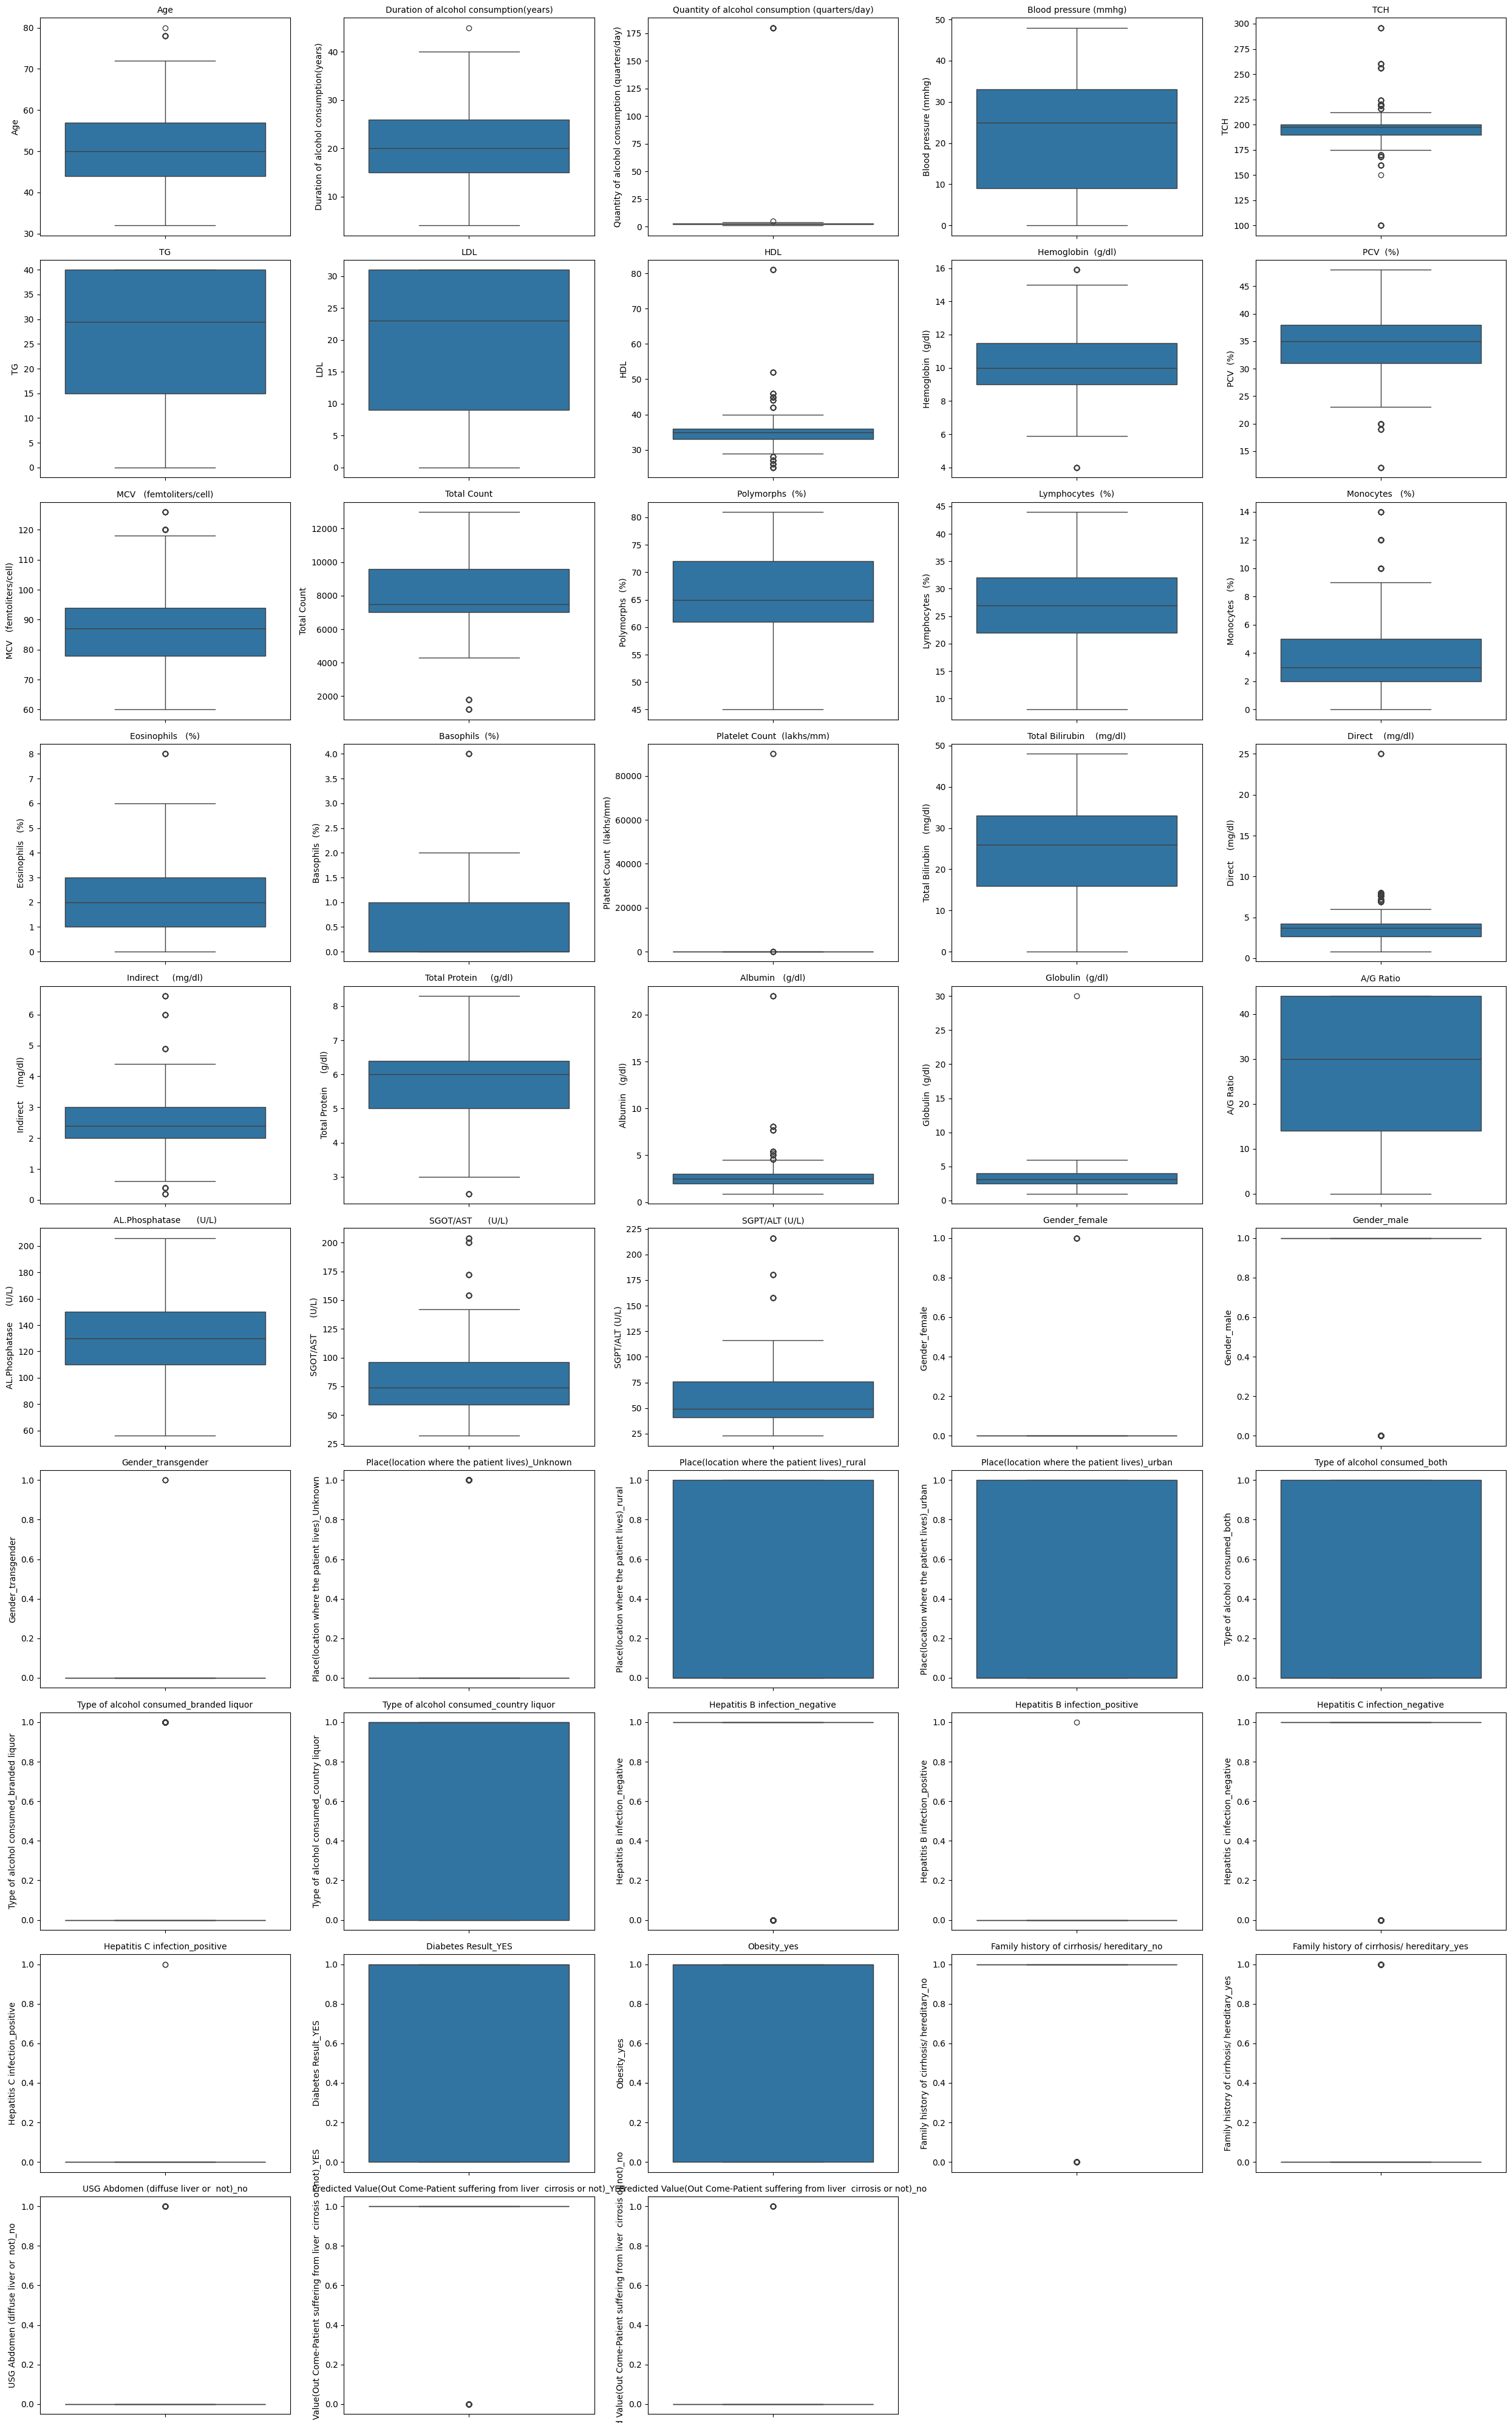

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)

# Determine number of rows and columns for subplots
cols = 5
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(cols * 5, rows * 4))  # Adjusting overall figure size

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()  # Prevents overlap

plt.show()


In [ ]:
# Clean up column names: remove extra spaces
df.columns = df.columns.str.strip()


In [ ]:
# Replace multiple spaces with single, and remove special characters if needed
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)


In [ ]:
df.columns = df.columns.str.lower()


In [ ]:
import numpy as np

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

outlier_cols = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
       outlier_cols.append(col)

print("Columns with outliers:")
print(outlier_cols)


Columns with outliers:
['age', 'duration of alcohol consumption(years)', 'quantity of alcohol consumption (quarters/day)', 'tch', 'hdl', 'hemoglobin (g/dl)', 'pcv (%)', 'mcv (femtoliters/cell)', 'total count', 'monocytes (%)', 'eosinophils (%)', 'basophils (%)', 'platelet count (lakhs/mm)', 'direct (mg/dl)', 'indirect (mg/dl)', 'total protein (g/dl)', 'albumin (g/dl)', 'globulin (g/dl)', 'sgot/ast (u/l)', 'sgpt/alt (u/l)', 'gender_female', 'gender_male', 'gender_transgender', 'place(location where the patient lives)_unknown', 'type of alcohol consumed_branded liquor', 'hepatitis b infection_negative', 'hepatitis b infection_positive', 'hepatitis c infection_negative', 'hepatitis c infection_positive', 'family history of cirrhosis/ hereditary_no', 'family history of cirrhosis/ hereditary_yes', 'usg abdomen (diffuse liver or not)_no', 'predicted value(out come-patient suffering from liver cirrosis or not)_yes', 'predicted value(out come-patient suffering from liver cirrosis or not)_no']


In [ ]:
# Keep only continuous numerical columns (exclude binary 0/1)
numeric_cols = df.select_dtypes(include='number').columns
continuous_cols = [col for col in numeric_cols if df[col].nunique() > 2]


In [ ]:
for col in continuous_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
      df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


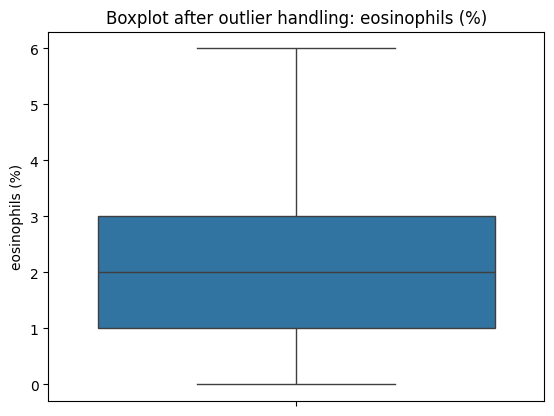

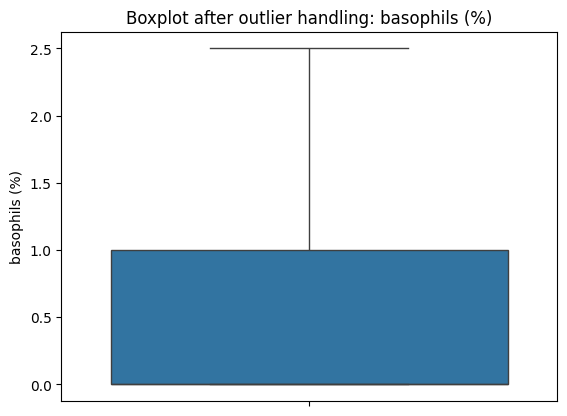

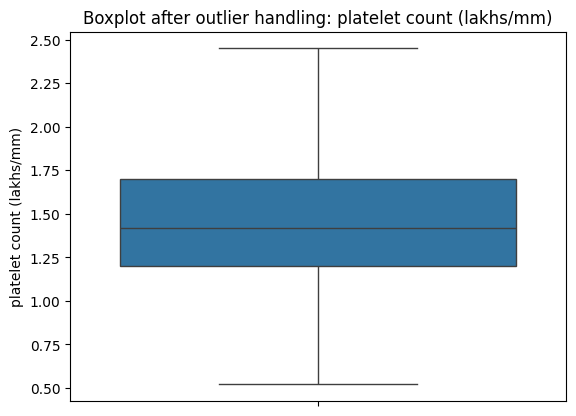

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check a few columns where you had outliers
cols_to_check = ['eosinophils (%)', 'basophils (%)', 'platelet count (lakhs/mm)']

for col in cols_to_check:
    sns.boxplot(df[col])
    plt.title(f'Boxplot after outlier handling: {col}')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called df
# And your target column is named something like:
# 'predicted value(out come-patient suffering from liver cirrosis or not)_yes'

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['predicted value(out come-patient suffering from liver cirrosis or not)_yes'])
y = df['predicted value(out come-patient suffering from liver cirrosis or not)_yes']

# Step 2: Split into training and test sets (80-20 split commonly used)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42,stratify=y)


                                                                                                                                                            # Check the shape
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (760, 47) (760,)
Test set shape: (190, 47) (190,)


In [ ]:
from sklearn.preprocessing import Normalizer

# Initialize L1 normalizer
l1_normalizer = Normalizer(norm='l1')

# Apply normalization
X_train_normalized = l1_normalizer.fit_transform(X_train)
X_test_normalized = l1_normalizer.transform(X_test)


In [ ]:
#verifying normalisation
import numpy as np

# Sum of absolute values (L1 norm) for each row should be 1
print(np.allclose(np.sum(X_train_normalized, axis=1), 1))
print(np.allclose(np.sum(X_test_normalized, axis=1), 1))


True
True


In [ ]:
df.to_excel('/content/drive/MyDrive/HealthcareData_processed.xlsx')

In [ ]:
# CSV files are smaller and faster to load
df.to_csv('/content/drive/MyDrive/HealthcareData_processed.csv', index=False)
X_train.to_csv('/content/drive/MyDrive/X_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/X_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/y_test.csv', index=False)

In [ ]:
df.describe()

,age,duration of alcohol consumption(years),quantity of alcohol consumption (quarters/day),blood pressure (mmhg),tch,tg,ldl,hdl,hemoglobin (g/dl),pcv (%),...,hepatitis b infection_positive,hepatitis c infection_negative,hepatitis c infection_positive,diabetes result_yes,obesity_yes,family history of cirrhosis/ hereditary_no,family history of cirrhosis/ hereditary_yes,usg abdomen (diffuse liver or not)_no,predicted value(out come-patient suffering from liver cirrosis or not)_yes,predicted value(out come-patient suffering from liver cirrosis or not)_no
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,50.614737,20.603684,2.202632,22.552632,196.120629,27.186316,19.568421,34.743158,10.270295,33.968632,...,0.001053,0.852632,0.002105,0.681053,0.577895,0.916842,0.070526,0.041053,0.922105,0.021053
std,8.753533,7.973021,0.822012,13.134021,10.978806,12.918649,11.389875,3.265529,1.884459,5.294891,...,0.032444,0.354660,0.045859,0.466314,0.494155,0.276266,0.256167,0.198516,0.268147,0.143635
min,32.000000,4.000000,1.000000,0.000000,175.000000,0.000000,0.000000,28.500000,5.250000,20.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,15.000000,2.000000,9.000000,190.000000,15.000000,9.000000,33.000000,9.000000,31.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,20.000000,2.000000,25.000000,197.544839,29.500000,23.000000,35.000000,10.000000,35.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,57.000000,26.000000,3.000000,33.000000,200.000000,40.000000,31.000000,36.000000,11.500000,38.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,76.500000,42.500000,4.500000,48.000000,215.000000,40.000000,31.000000,40.500000,15.250000,48.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


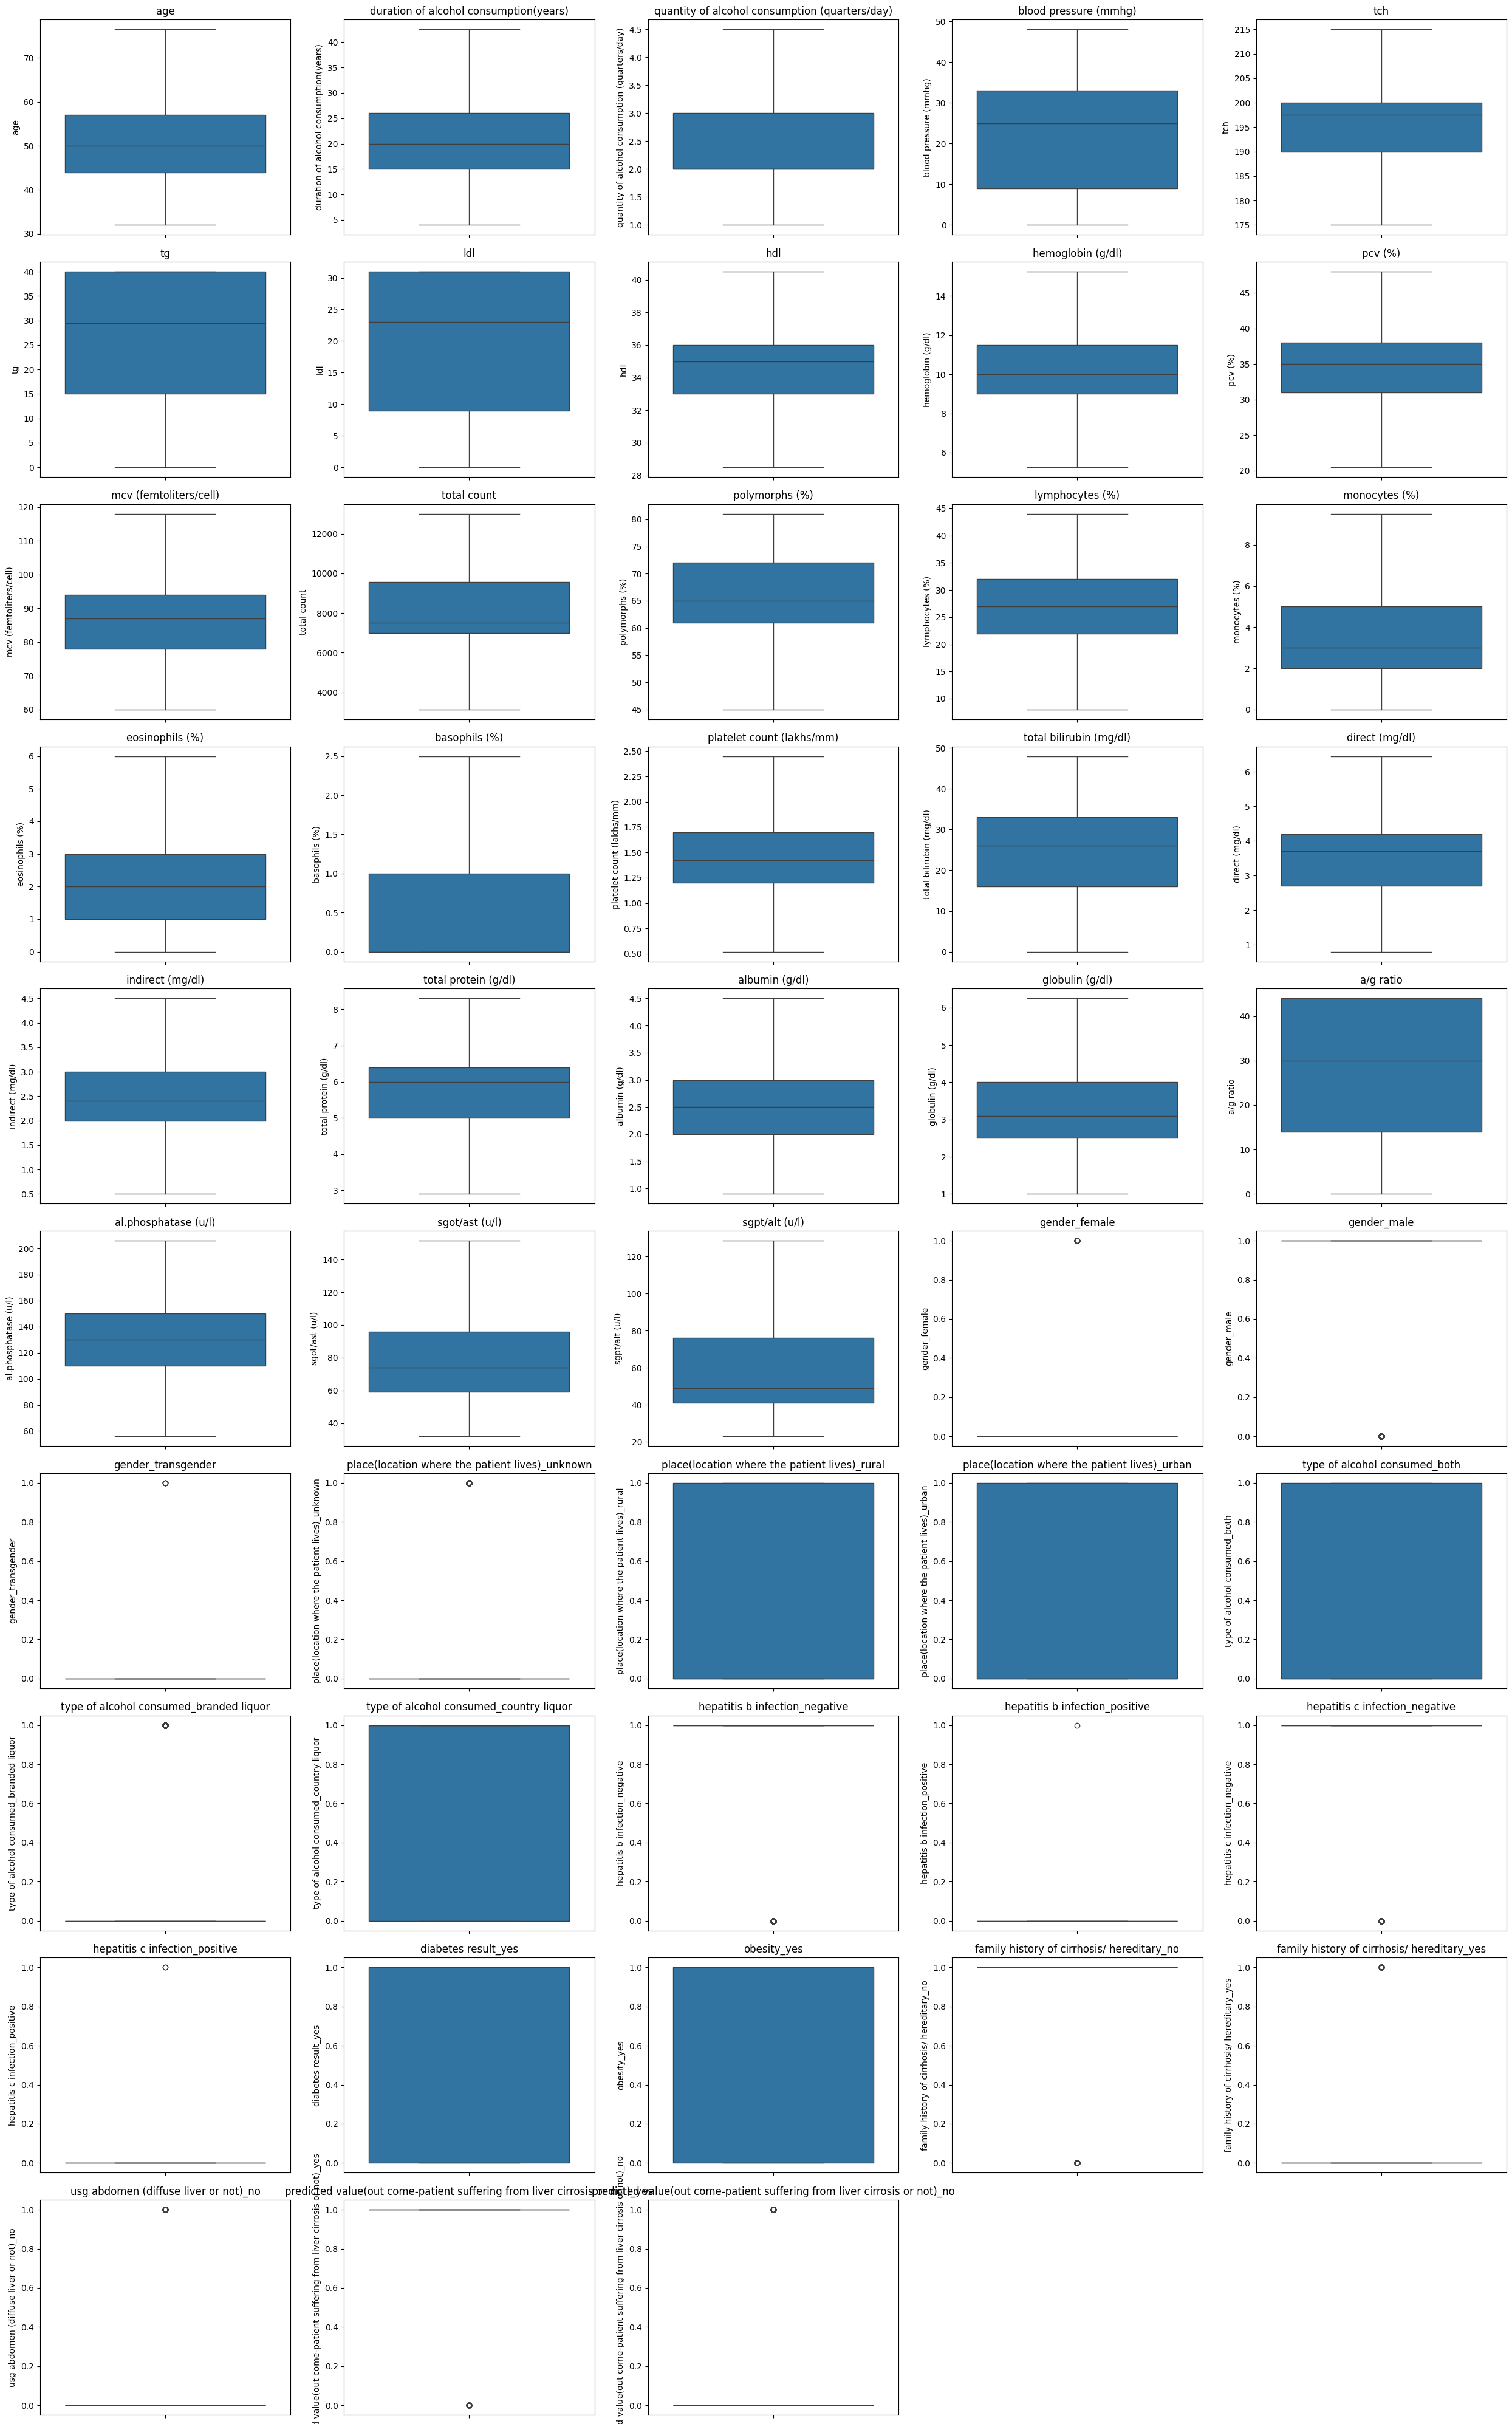

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Grid size calculation
n = len(num_cols)
cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



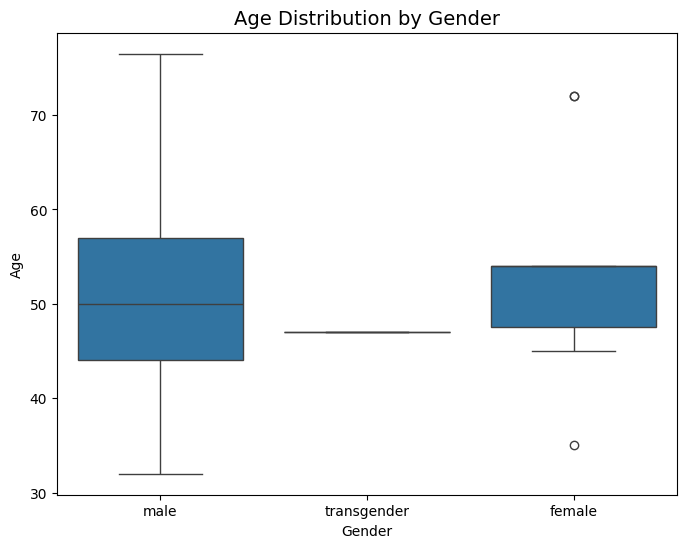

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample: Replace this with your actual dataframe if needed
# df = pd.read_csv("your_file.csv")

# Step 1: Combine one-hot encoded gender columns into a single 'gender' column
gender_columns = ['gender_male', 'gender_female', 'gender_transgender']

# Check which columns actually exist to avoid error
available_gender_cols = [col for col in gender_columns if col in df.columns]

# Only proceed if gender columns exist
if available_gender_cols:
    df['gender'] = df[available_gender_cols].idxmax(axis=1)
    df['gender'] = df['gender'].str.replace('gender_', '')  # remove prefix
else:
    print("Gender columns not found. Please check your column names.")

            # Step 2: Boxplot - Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title("Age Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()



In [ ]:
print([col for col in df.columns if 'place' in col])


['place(location where the patient lives)_unknown', 'place(location where the patient lives)_rural', 'place(location where the patient lives)_urban']


In [ ]:
# Reconstruct 'place' column from one-hot encoded columns
place_columns = [col for col in df.columns if 'place(location where the patient lives)' in col]

# Create a single 'place' column
df['place'] = df[place_columns].idxmax(axis=1).str.split('_').str[-1]


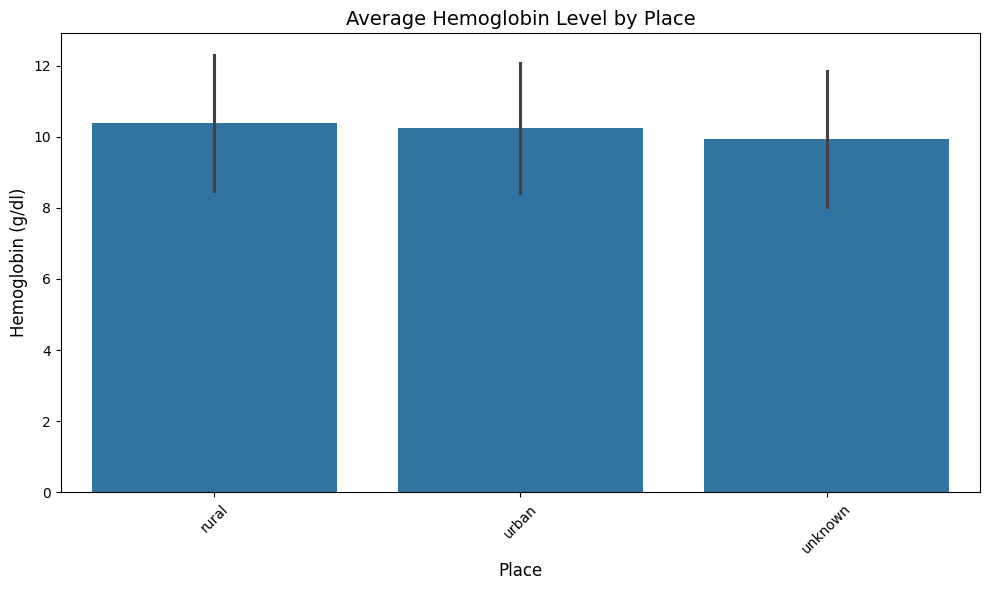

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='place', y='hemoglobin (g/dl)', data=df, estimator='mean', errorbar='sd')
plt.title("Average Hemoglobin Level by Place", fontsize=14)
plt.xlabel("Place", fontsize=12)
plt.ylabel("Hemoglobin (g/dl)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Identify one-hot encoded place columns
place_columns = [col for col in df.columns if 'place(location where the patient lives)' in col]

# Combine them into a single categorical column
df['place'] = df[place_columns].idxmax(axis=1).str.split('_').str[-1]


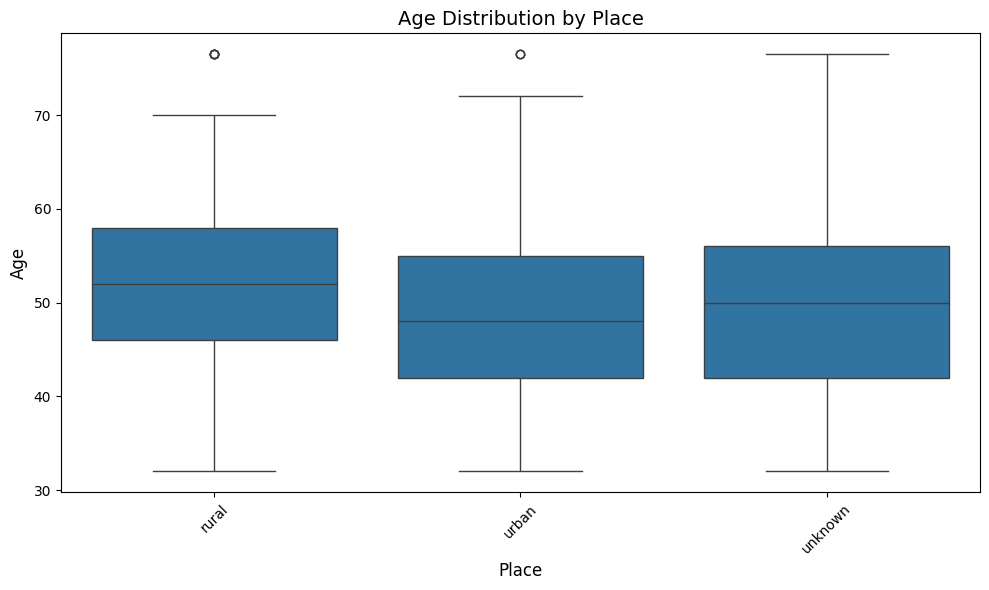

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='place', y='age', data=df)
plt.title("Age Distribution by Place", fontsize=14)
plt.xlabel("Place", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())


['age', 'duration of alcohol consumption(years)', 'quantity of alcohol consumption (quarters/day)', 'blood pressure (mmhg)', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin (g/dl)', 'pcv (%)', 'mcv (femtoliters/cell)', 'total count', 'polymorphs (%)', 'lymphocytes (%)', 'monocytes (%)', 'eosinophils (%)', 'basophils (%)', 'platelet count (lakhs/mm)', 'total bilirubin (mg/dl)', 'direct (mg/dl)', 'indirect (mg/dl)', 'total protein (g/dl)', 'albumin (g/dl)', 'globulin (g/dl)', 'a/g ratio', 'al.phosphatase (u/l)', 'sgot/ast (u/l)', 'sgpt/alt (u/l)', 'gender_female', 'gender_male', 'gender_transgender', 'place(location where the patient lives)_unknown', 'place(location where the patient lives)_rural', 'place(location where the patient lives)_urban', 'type of alcohol consumed_both', 'type of alcohol consumed_branded liquor', 'type of alcohol consumed_country liquor', 'hepatitis b infection_negative', 'hepatitis b infection_positive', 'hepatitis c infection_negative', 'hepatitis c infection_positive',

/tmp/ipython-input-40-3005417592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='place', palette='Set2')


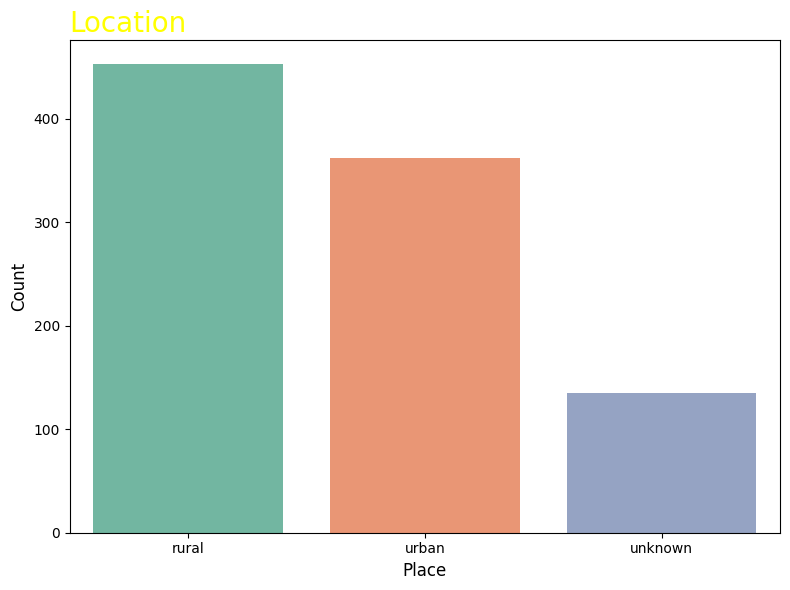

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='place', palette='Set2')

plt.title("Location", color='yellow', fontsize=20, loc='left')
plt.xlabel("Place", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



<Axes: xlabel='age', ylabel='hemoglobin (g/dl)'>

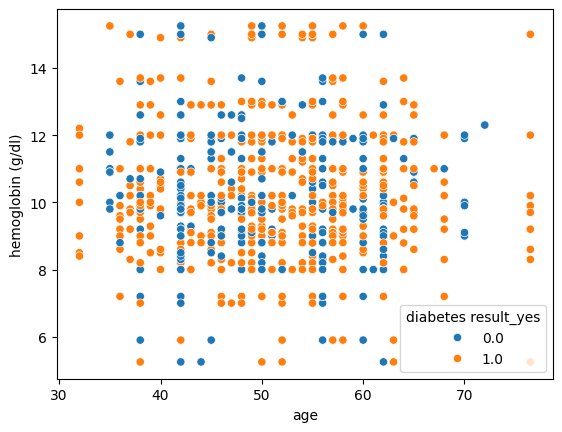

In [ ]:
sns.scatterplot(data=df, x='age', y='hemoglobin (g/dl)', hue='diabetes result_yes')


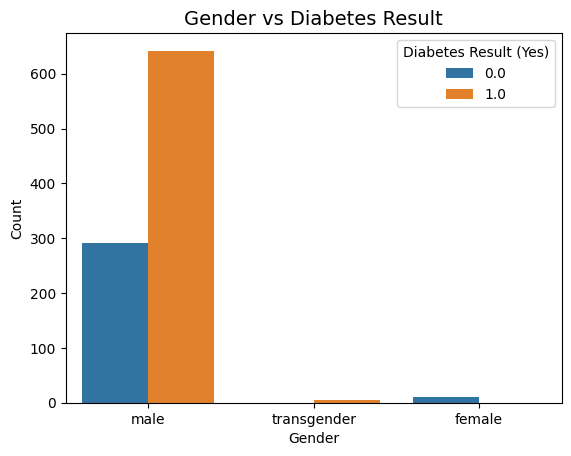

In [ ]:
sns.countplot(data=df, x='gender', hue='diabetes result_yes')
plt.title("Gender vs Diabetes Result", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Diabetes Result (Yes)')
plt.show()


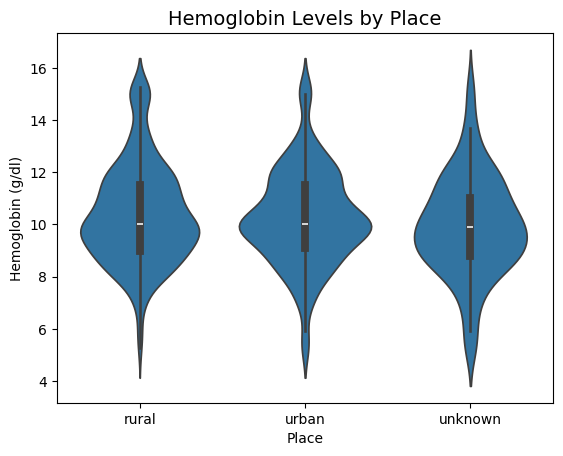

In [ ]:
sns.violinplot(data=df, x='place', y='hemoglobin (g/dl)', inner='box')
plt.title("Hemoglobin Levels by Place", fontsize=14)
plt.xlabel("Place")
plt.ylabel("Hemoglobin (g/dl)")
plt.show()


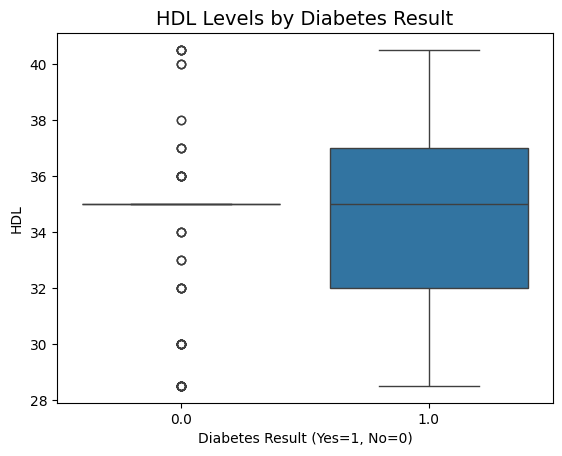

In [ ]:
sns.boxplot(data=df, x='diabetes result_yes', y='hdl')
plt.title("HDL Levels by Diabetes Result", fontsize=14)
plt.xlabel("Diabetes Result (Yes=1, No=0)")
plt.ylabel("HDL")
plt.show()


<Axes: xlabel='type of alcohol consumed_country liquor', ylabel='duration of alcohol consumption(years)'>

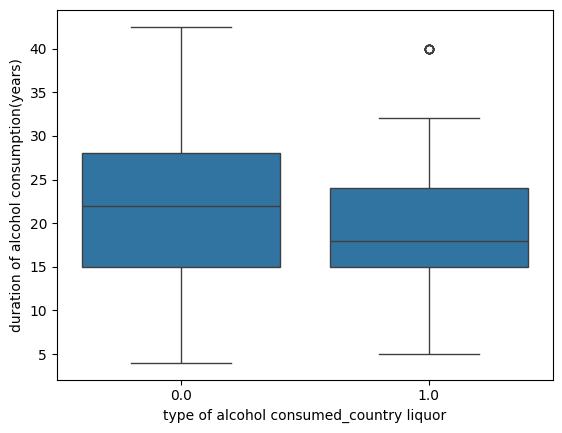

In [ ]:
sns.boxplot(x='type of alcohol consumed_country liquor', y='duration of alcohol consumption(years)', data=df)


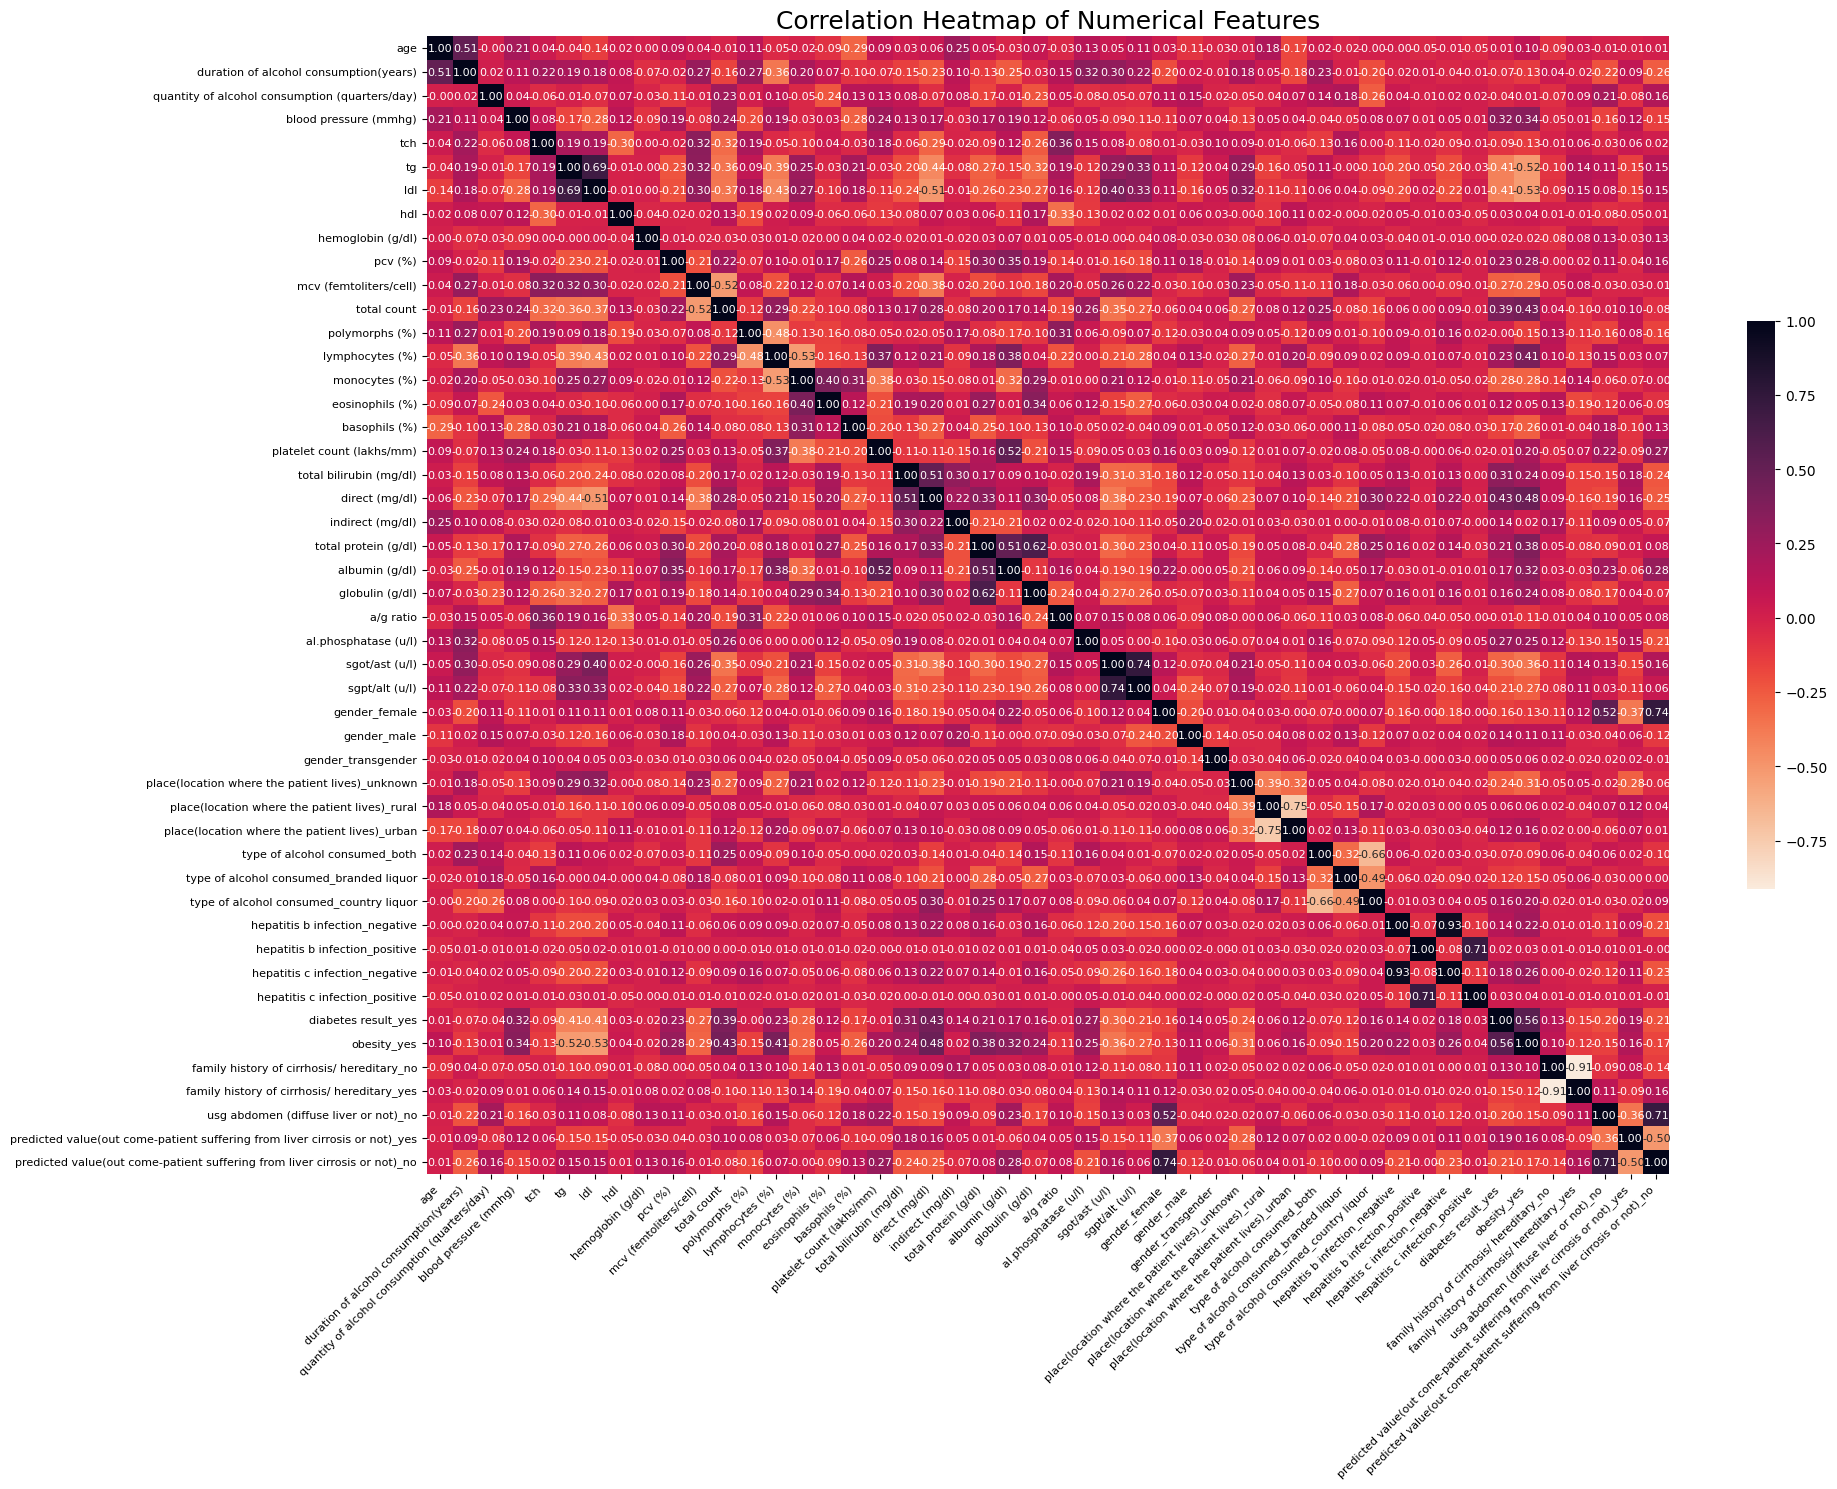

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(
 df.corr(numeric_only=True),
 annot=True,
 fmt=".2f",
 cmap='rocket_r',
 annot_kws={"size": 8},  # smaller font size
 cbar_kws={'shrink': 0.5}  # shrink color bar
             )
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called df
# And your target column is named something like:
# 'predicted value(out come-patient suffering from liver cirrosis or not)_yes'

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['predicted value(out come-patient suffering from liver cirrosis or not)_yes'])
y = df['predicted value(out come-patient suffering from liver cirrosis or not)_yes']

# Step 2: Split into training and test sets (80-20 split commonly used)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42,stratify=y)


                                                                                                                                                            # Check the shape
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (760, 49) (760,)
Test set shape: (190, 49) (190,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit on numeric training columns only
scaler.fit(X_train[numeric_columns])

# Transform both train and test on numeric columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = scaler.transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])



In [ ]:
print(X_train_scaled.dtypes.value_counts())
print(X_train_scaled.select_dtypes(include=['object']).columns)


float64    47
object      2
Name: count, dtype: int64
Index(['gender', 'place'], dtype='object')


In [ ]:
X_train = X_train.drop(columns=['gender', 'place'])
X_test = X_test.drop(columns=['gender', 'place'])


In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l1')
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9368421052631579
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.20      0.33        15
         1.0       0.94      1.00      0.97       175

    accuracy                           0.94       190
   macro avg       0.97      0.60      0.65       190
weighted avg       0.94      0.94      0.92       190



KNN CLASSIFICATION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify column types
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # Logistic Regression pipeline
logreg_pipeline = Pipeline([
("preprocess", preprocessor),
("logreg", LogisticRegression(max_iter=1000))  # max_iter increased for convergence
])

                # Train the model
logreg_pipeline.fit(X_train, y_train)

                # Predict
y_pred = logreg_pipeline.predict(X_test)

                # Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9157894736842105

Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.27      0.33        15
         1.0       0.94      0.97      0.96       175

    accuracy                           0.92       190
   macro avg       0.69      0.62      0.64       190
weighted avg       0.90      0.92      0.91       190



LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for numeric and categorical features
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # Define logistic regression with cross-validation pipeline
logreg_cv_pipeline = Pipeline([
("preprocess", preprocessor),
("logreg_cv", LogisticRegressionCV(cv=5, max_iter=1000, scoring='accuracy'))
])

                # Fit the model
logreg_cv_pipeline.fit(X_train, y_train)

                # Predict on test data
y_pred = logreg_cv_pipeline.predict(X_test)

                # Evaluate performance
print("Logistic Regression CV Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression CV Accuracy: 0.9421052631578948

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.27      0.42        15
         1.0       0.94      1.00      0.97       175

    accuracy                           0.94       190
   macro avg       0.97      0.63      0.70       190
weighted avg       0.95      0.94      0.93       190



LOGISTIC REGRESSION CV


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for numeric and categorical features
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # Define pipeline with Gaussian Naive Bayes
nb_pipeline = Pipeline([
("preprocess", preprocessor),
("nb", GaussianNB())
])
                # Fit the model
nb_pipeline.fit(X_train, y_train)

                # Predict on test set
y_pred = nb_pipeline.predict(X_test)

                # Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

         0.0       0.12      0.67      0.21        15
         1.0       0.95      0.59      0.73       175

    accuracy                           0.60       190
   macro avg       0.54      0.63      0.47       190
weighted avg       0.89      0.60      0.69       190



NAIVE BAYES CLASSIFICATION


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # Define Random Forest model pipeline
rf_pipeline = Pipeline([
("preprocess", preprocessor),
("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

                # Train the model
rf_pipeline.fit(X_train, y_train)

                # Predict on test set
y_pred = rf_pipeline.predict(X_test)

                # Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8842105263157894

Classification Report:
               precision    recall  f1-score   support

         0.0       0.27      0.27      0.27        15
         1.0       0.94      0.94      0.94       175

    accuracy                           0.88       190
   macro avg       0.60      0.60      0.60       190
weighted avg       0.88      0.88      0.88       190



RANDOM FOREST CLASSIFICATION

In [ ]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # XGBoost pipeline
xgb_pipeline = Pipeline([
("preprocess", preprocessor),
("xgb", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, eval_metric='mlogloss', random_state=42))
])

                # Fit the model
xgb_pipeline.fit(X_train, y_train)

                # Predict
y_pred = xgb_pipeline.predict(X_test)

                # Evaluate
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


XGBoost Classifier Accuracy: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

         0.0       0.31      0.27      0.29        15
         1.0       0.94      0.95      0.94       175

    accuracy                           0.89       190
   macro avg       0.62      0.61      0.61       190
weighted avg       0.89      0.89      0.89       190



XGBOOST CLASSIFICATION

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing
preprocessor = ColumnTransformer([
("num", StandardScaler(), numeric_cols),
("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

        # Define Ridge Classifier pipeline
ridge_pipeline = Pipeline([
("preprocess", preprocessor),
("ridge", RidgeClassifier())
])

                # Fit the model
ridge_pipeline.fit(X_train, y_train)

                # Predict on test set
y_pred = ridge_pipeline.predict(X_test)

                # Evaluate
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Ridge Classifier Accuracy: 0.9421052631578948

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.27      0.42        15
         1.0       0.94      1.00      0.97       175

    accuracy                           0.94       190
   macro avg       0.97      0.63      0.70       190
weighted avg       0.95      0.94      0.93       190



RIDGE CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Dictionary to store models
models = {
      "Logistic Regression": LogisticRegression(max_iter=1000),
      "Logistic Regression CV": LogisticRegressionCV(cv=5, max_iter=1000),
      "XGBoost Classifier": XGBClassifier(eval_metric='logloss'),
      "Ridge Classifier": RidgeClassifier(),
      "KNN Classifier": KNeighborsClassifier(),
      "Random Forest": RandomForestClassifier(),
      "Naive Bayes": GaussianNB()
                                                    }

results = []
for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

        results.append({
                        "Model": name,
                        "Accuracy": round(acc, 4),
                        "Precision (Macro)": round(report['macro avg']['precision'], 4),
                        "Recall (Macro)": round(report['macro avg']['recall'], 4),
                        "F1-Score (Macro)": round(report['macro avg']['f1-score'], 4)
                                            })



results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0     Logistic Regression    0.9211             0.4605          0.5000   
1  Logistic Regression CV    0.9211             0.4605          0.5000   
2      XGBoost Classifier    0.8789             0.5934          0.5990   
3        Ridge Classifier    0.9211             0.4605          0.5000   
4          KNN Classifier    0.9368             0.9679          0.6000   
5           Random Forest    0.9105             0.6694          0.6162   
6             Naive Bayes    0.8632             0.6035          0.6514   

   F1-Score (Macro)  
0            0.4795  
1            0.4795  
2            0.5961  
3            0.4795  
4            0.6501  
5            0.6361  
6            0.6199  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
        }

            # Create base KNN model
knn = KNeighborsClassifier()

            # Use GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                          cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

                                       # Fit the model
grid_search.fit(X_train, y_train)

                                       # Best estimator
best_knn = grid_search.best_estimator_
print("Best KNN Parameters:", grid_search.best_params_)

                                       # Predict on test data
y_pred = best_knn.predict(X_test)

                                       # Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9421052631578948
Confusion Matrix:
 [[  4  11]
 [  0 175]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.27      0.42        15
         1.0       0.94      1.00      0.97       175

    accuracy                           0.94       190
   macro avg       0.97      0.63      0.70       190
weighted avg       0.95      0.94      0.93       190



In [ ]:
import pickle

# Assuming you used GridSearchCV to tune your KNN model
knn_model = grid_search.best_estimator_  # Extract the best model

# Save the model to a file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

print("KNN model saved as 'knn_model.pkl'")


KNN model saved as 'knn_model.pkl'


In [ ]:
import pickle


    # Save the normalizer
with open('normalizer.pkl', 'wb') as f:
    pickle.dump(normalizer, f)


In [ ]:
from google.colab import files

files.download("knn_model.pkl")
files.download("normalizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_features = X_train.columns.tolist()  # X_train is your training data used for KNN
print("Number of features:", len(model_features))
print("Feature names:", model_features)



Number of features: 47
Feature names: ['age', 'duration of alcohol consumption(years)', 'quantity of alcohol consumption (quarters/day)', 'blood pressure (mmhg)', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin (g/dl)', 'pcv (%)', 'mcv (femtoliters/cell)', 'total count', 'polymorphs (%)', 'lymphocytes (%)', 'monocytes (%)', 'eosinophils (%)', 'basophils (%)', 'platelet count (lakhs/mm)', 'total bilirubin (mg/dl)', 'direct (mg/dl)', 'indirect (mg/dl)', 'total protein (g/dl)', 'albumin (g/dl)', 'globulin (g/dl)', 'a/g ratio', 'al.phosphatase (u/l)', 'sgot/ast (u/l)', 'sgpt/alt (u/l)', 'gender_female', 'gender_male', 'gender_transgender', 'place(location where the patient lives)_unknown', 'place(location where the patient lives)_rural', 'place(location where the patient lives)_urban', 'type of alcohol consumed_both', 'type of alcohol consumed_branded liquor', 'type of alcohol consumed_country liquor', 'hepatitis b infection_negative', 'hepatitis b infection_positive', 'hepatitis c infection_negati

In [ ]:
# Get the correct feature set (from training)
model_features = X_train.columns.tolist()

# Apply it to your new data (e.g., before prediction)
df = df[model_features]


In [ ]:
print("New columns in current data:")
print(set(df.columns) - set(model_features))

print("Missing columns from training data:")
print(set(model_features) - set(df.columns))


New columns in current data:
set()
Missing columns from training data:
set()


In [ ]:
df.shape

(950, 47)

In [ ]:
import pickle

# Assuming you used GridSearchCV to tune your KNN model
knn_model = grid_search.best_estimator_  # Extract the best model

# Save the model to a file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

print("KNN model saved as 'knn_model.pkl'")

KNN model saved as 'knn_model.pkl'


In [ ]:
import pickle


    # Save the normalizer
with open('normalizer.pkl', 'wb') as f:
  pickle.dump(normalizer, f)

In [ ]:
print(X_train.columns.tolist())


['age', 'duration of alcohol consumption(years)', 'quantity of alcohol consumption (quarters/day)', 'blood pressure (mmhg)', 'tch', 'tg', 'ldl', 'hdl', 'hemoglobin (g/dl)', 'pcv (%)', 'mcv (femtoliters/cell)', 'total count', 'polymorphs (%)', 'lymphocytes (%)', 'monocytes (%)', 'eosinophils (%)', 'basophils (%)', 'platelet count (lakhs/mm)', 'total bilirubin (mg/dl)', 'direct (mg/dl)', 'indirect (mg/dl)', 'total protein (g/dl)', 'albumin (g/dl)', 'globulin (g/dl)', 'a/g ratio', 'al.phosphatase (u/l)', 'sgot/ast (u/l)', 'sgpt/alt (u/l)', 'gender_female', 'gender_male', 'gender_transgender', 'place(location where the patient lives)_unknown', 'place(location where the patient lives)_rural', 'place(location where the patient lives)_urban', 'type of alcohol consumed_both', 'type of alcohol consumed_branded liquor', 'type of alcohol consumed_country liquor', 'hepatitis b infection_negative', 'hepatitis b infection_positive', 'hepatitis c infection_negative', 'hepatitis c infection_positive',

In [ ]:
import pickle
with open('model_features.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)


In [ ]:
from google.colab import files
files.download('knn_model.pkl')
files.download('normalizer.pkl')         # or normalizer.pkl
files.download('model_features.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the fitted OneHotEncoder
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe,f)

In [ ]:
with open('label_encoders.pkl', 'wb') as f:
      pickle.dump(le, f)

In [ ]:
from google.colab import files
files.download('onehot_encoder.pkl')
files.download('label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Assuming label_encoders is your dictionary like: {'Gender': LabelEncoder(), 'Smoking': LabelEncoder(), ...}
pickle.dump(le, open("label_encoders.pkl", "wb"))

In [ ]:
from google.colab import files

In [ ]:
files.download('label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>